In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.metrics import classification_report

```python
# Use the alternative stopwords imported below (with meny more stopwords)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('swedish')
```

In [3]:
import pprint as pp

In [4]:
from inc import stop_words as sw
from inc import extra_stopwords as esw

In [5]:
from sqlalchemy import create_engine
table_name = 'Training_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [6]:
df = pd.read_sql_table(table_name, engine)

2020-12-19 02:09:41,173 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-19 02:09:41,175 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:09:41,176 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-19 02:09:41,177 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:09:41,179 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-19 02:09:41,180 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:09:41,182 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-19 02:09:41,182 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:09:41,184 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set")
2020-12-19 02:09:41,185 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 02:09:41,187 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNI

In [7]:
df = df.rename(columns={"class": "label"})
df = df.convert_dtypes()

In [8]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [9]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [10]:
train_data = train.abstract.tolist()
train_labels = train.label.tolist()

test_data = test.abstract.tolist()
test_labels = test.label.tolist()

In [11]:
from collections import Counter
Counter(train_labels)

Counter({13: 80,
         12: 78,
         7: 84,
         5: 41,
         10: 86,
         9: 86,
         8: 82,
         3: 86,
         11: 79,
         6: 67,
         2: 82,
         17: 78,
         4: 70,
         14: 79,
         16: 75,
         15: 73})

In [12]:
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words=sw.STOP_WORDS, max_features=None)

term_docs_train = tfidf_vectorizer.fit_transform(train_data)
term_docs_test = tfidf_vectorizer.transform(test_data)

In [14]:
from sklearn.svm import SVC

In [15]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(term_docs_train, train_labels)

SVC(kernel='linear', random_state=42)

In [16]:
accuracy = svm.score(term_docs_test, test_labels)
print('The accuracy of multiclass classification is: {0:.1f}%'.format(accuracy*100))

The accuracy of multiclass classification is: 37.1%


In [20]:
labels = svm.predict(term_docs_test)

In [21]:
confusion_mx = {}
for ix, label in enumerate(labels):
    if label == test_labels[ix]:
        if label in confusion_mx:
            confusion_mx[label] += 1
        else:
            confusion_mx[label] = 1

In [22]:
conf_labels = list(range(2,18))

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_labels, labels, labels=conf_labels)

In [24]:
sorted_dict = dict(sorted(confusion_mx.items()))

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

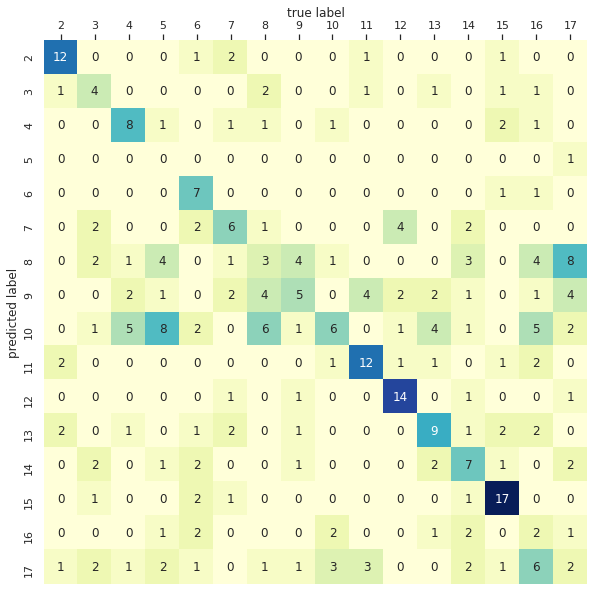

In [27]:
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

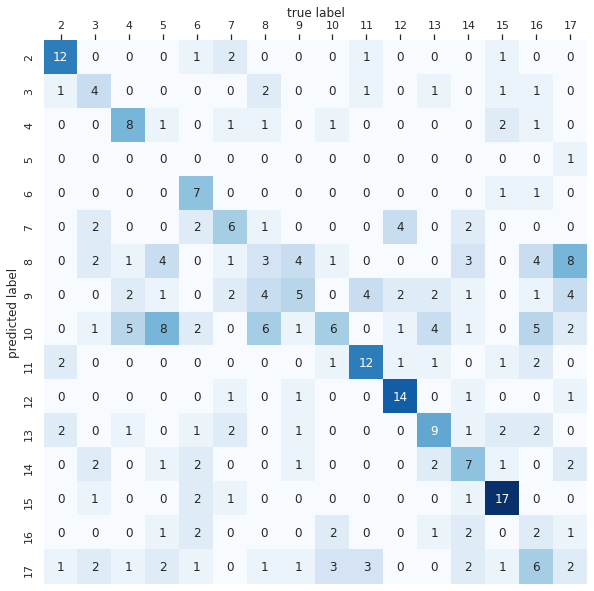

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
fig.savefig('img/heat_map_SVM.png')

In [17]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, prediction)

In [18]:
print(report)

              precision    recall  f1-score   support

           2       0.71      0.67      0.69        18
           3       0.36      0.29      0.32        14
           4       0.53      0.44      0.48        18
           5       0.00      0.00      0.00        18
           6       0.78      0.35      0.48        20
           7       0.35      0.38      0.36        16
           8       0.10      0.17      0.12        18
           9       0.18      0.36      0.24        14
          10       0.14      0.43      0.21        14
          11       0.60      0.57      0.59        21
          12       0.78      0.64      0.70        22
          13       0.43      0.45      0.44        20
          14       0.39      0.33      0.36        21
          15       0.77      0.63      0.69        27
          16       0.18      0.08      0.11        25
          17       0.08      0.10      0.09        21

    accuracy                           0.37       307
   macro avg       0.40   